In [1]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Data Retrieval

In [2]:
#load the csv data in a dataframe
DATA_PATH=".//dataset"
DATA_NAME="clinical_patient_brca.txt"

import pandas as pd

def load_raw_data(data_path, data_name):
    csv_path = os.path.join(data_path, data_name)
    return pd.read_csv(csv_path,sep='\t', lineterminator='\n',header=[0,1,2])

df=load_raw_data(DATA_PATH,DATA_NAME)

FileNotFoundError: [Errno 2] No such file or directory: './/dataset\\clinical_patient_brca.txt'

# Data Info

In [8]:
df.head()

,bcr_patient_uuid,bcr_patient_barcode,form_completion_date,prospective_collection,retrospective_collection,birth_days_to,gender,menopause_status,race,ethnicity,...,icd_o_3_histology,icd_o_3_site,informed_consent_verified,metastatic_tumor_indicator,patient_id,project_code,site_of_primary_tumor_other,stage_other,tissue_source_site,tumor_tissue_site
,bcr_patient_uuid,bcr_patient_barcode,form_completion_date,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,days_to_birth,gender,menopause_status,race,ethnicity,...,icd_o_3_histology,icd_o_3_site,informed_consent_verified,distant_metastasis_present_ind2,patient_id,project_code,tumor_tissue_site_other,stage_other,tissue_source_site,tumor_tissue_site
,CDE_ID:,CDE_ID:2003301,CDE_ID:,CDE_ID:3088492,CDE_ID:3088528,CDE_ID:3008233,CDE_ID:2200604,CDE_ID:2957270,CDE_ID:2192199,CDE_ID:2192217,...,CDE_ID:3226275,CDE_ID:3226281,CDE_ID:3288361,CDE_ID:2194698,CDE_ID:,CDE_ID:,CDE_ID:2584114,CDE_ID:2007104,CDE_ID:,CDE_ID:3427536
0,6E7D5EC6-A469-467C-B748-237353C23416,TCGA-3C-AAAU,2014-1-13,NO,YES,-20211,FEMALE,Pre (<6 months since LMP AND no prior bilatera...,WHITE,NOT HISPANIC OR LATINO,...,8520/3,C50.9,YES,[Not Available],AAAU,[Not Available],[Not Applicable],[Not Available],3C,Breast
1,55262FCB-1B01-4480-B322-36570430C917,TCGA-3C-AALI,2014-7-28,NO,YES,-18538,FEMALE,Post (prior bilateral ovariectomy OR >12 mo si...,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,8500/3,C50.9,YES,[Not Available],AALI,[Not Available],[Not Applicable],[Not Available],3C,Breast
2,427D0648-3F77-4FFC-B52C-89855426D647,TCGA-3C-AALJ,2014-7-28,NO,YES,-22848,FEMALE,Post (prior bilateral ovariectomy OR >12 mo si...,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,8500/3,C50.9,YES,[Not Available],AALJ,[Not Available],[Not Applicable],[Not Available],3C,Breast
3,C31900A4-5DCD-4022-97AC-638E86E889E4,TCGA-3C-AALK,2014-7-28,NO,YES,-19074,FEMALE,[Unknown],BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,...,8500/3,C50.9,YES,[Not Available],AALK,[Not Available],[Not Applicable],[Not Available],3C,Breast
4,6623FC5E-00BE-4476-967A-CBD55F676EA6,TCGA-4H-AAAK,2014-11-13,YES,NO,-18371,FEMALE,Post (prior bilateral ovariectomy OR >12 mo si...,WHITE,NOT HISPANIC OR LATINO,...,8520/3,C50.9,YES,[Not Available],AAAK,[Not Available],[Not Applicable],[Not Available],4H,Breast


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Columns: 112 entries, ('bcr_patient_uuid', 'bcr_patient_uuid', 'CDE_ID:') to ('tumor_tissue_site', 'tumor_tissue_site', 'CDE_ID:3427536')
dtypes: int64(2), object(110)
memory usage: 960.0+ KB


# Data Cleaning (Feature Selection 1)

In [10]:

#set ['Not Available'] data miss sensitivity (0->1)  
data_miss_sen=0.3;
bias_data_miss=len(df)*data_miss_sen;


#create dataframe copy (clean version)
df_clean=df.copy();

#remove ['Not Available'] data columns
for feature in df.columns:
    hist=df[feature].value_counts()
    if '[Not Available]' in hist:
        if hist['[Not Available]']>bias_data_miss:
            del df_clean[feature]


#remove single value features
for feature in df_clean.columns:
    hist=df_clean[feature].value_counts()
    if (len(hist)==1):
        del df_clean[feature] 



#merge features
df_clean[('histological_type','histological_type', 'CDE_ID:3081934')][df_clean[('histological_type','histological_type', 'CDE_ID:3081934')]=='Other, specify']=df_clean[('histologic_diagnosis_other', 'histological_type_other', 'CDE_ID:3124492')]
df_clean[('histological_type','histological_type', 'CDE_ID:3081934')].value_counts()

del df_clean[('histologic_diagnosis_other', 'histological_type_other', 'CDE_ID:3124492')]

#remove unnecessary features
del df_clean['bcr_patient_uuid'], df_clean['form_completion_date']
del df_clean['patient_id'], df_clean['birth_days_to']
df_clean.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 38 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   (bcr_patient_barcode, bcr_patient_barcode, CDE_ID:2003301)                                                       1097 non-null   object
 1   (prospective_collection, tissue_prospective_collection_indicator, CDE_ID:3088492)                                1097 non-null   object
 2   (retrospective_collection, tissue_retrospective_collection_indicator, CDE_ID:3088528)                            1097 non-null   object
 3   (gender, gender, CDE_ID:2200604)                                                                                 1097 non-null   object
 4   (menopause_status, menopause_status, CDE_I

In [13]:
col_names=df_clean.columns
train_col_idx=[3,4,7,9,10,14,15,17,18,20,21,22,27,28,29,30,31,32,33,37]
df_clean[col_names[train_col_idx]].info()
df_clean_dataset=df_clean[col_names[train_col_idx]].copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 20 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   (gender, gender, CDE_ID:2200604)                                                              1097 non-null   object
 1   (menopause_status, menopause_status, CDE_ID:2957270)                                          1097 non-null   object
 2   (history_other_malignancy, other_dx, CDE_ID:3382736)                                          1097 non-null   object
 3   (tumor_status, person_neoplasm_cancer_status, CDE_ID:2759550)                                 1097 non-null   object
 4   (vital_status, vital_status, CDE_ID:5)                                                        1097 non-null   object
 5   (age_at_diagnosis, age_at_initial_

In [24]:
col_name=df_clean_dataset.columns
df_clean_dataset[col_name[2]].value_counts()
df_clean_dataset[col_name[3]].value_counts()

TUMOR FREE         878
[Not Available]    105
WITH TUMOR          94
[Unknown]           20
Name: (tumor_status, person_neoplasm_cancer_status, CDE_ID:2759550), dtype: int64

# Data Visualization

In [6]:
df_clean[('vital_status', 'vital_status', 'CDE_ID:5') ].value_counts()

Alive    993
Dead     104
Name: (vital_status, vital_status, CDE_ID:5), dtype: int64

([&lt;matplotlib.patches.Wedge at 0x17cda27bd60&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cda28e4c0&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cda28eb50&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc29a220&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc29a8b0&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc29af40&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc2a7610&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc2a7ca0&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc2b2370&gt;],
 [Text(-0.17720969084482785, 1.0856319475175187, &#39;Core needle biopsy&#39;),
  Text(-0.7716678768556692, -0.783918801808621, &#39;Tumor resection&#39;),
  Text(-0.033072183039466505, -1.0995027197369747, &#39;Fine needle aspiration biopsy&#39;),
  Text(0.5490901674355094, -0.9531526572515256, &#39;[Not Available]&#39;),
  Text(0.9175591326177667, -0.6067002869207595, &#39;Other method, specify:&#39;),
  Text(1.0468414180156722, -0.3378210258804753, &#39;Excisional Biopsy&#39;),
  Text(1.0848606402166052, -0.181871

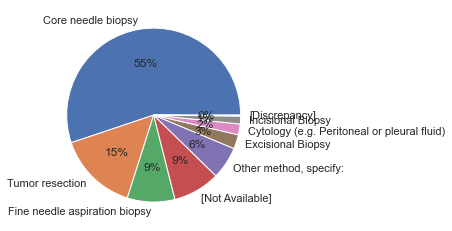

In [7]:
hist=df_clean[('method_initial_path_dx', 'initial_pathologic_diagnosis_method', 'CDE_ID:2757941')].value_counts()

plt.pie(hist.values, labels=hist.index,autopct='%1.0f%%')

([&lt;matplotlib.patches.Wedge at 0x17cdc398be0&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc3a6310&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc3a69a0&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc3a6fd0&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc3b5700&gt;],
 [Text(-0.476663849244769, 0.9913584492115656, &#39;Post (prior bilateral ovariectomy OR &gt;12 mo since LMP with no prior hysterectomy)&#39;),
  Text(-0.020474970547062245, -1.0998094269377294, &#39;Pre (&lt;6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement)&#39;),
  Text(0.7489045210590722, -0.8056935014863169, &#39;Peri (6-12 months since last menstrual period)&#39;),
  Text(0.8998107209232401, -0.6327247952400784, &#39;Indeterminate (neither Pre or Postmenopausal)&#39;),
  Text(1.063664720599671, -0.28038787803973286, &#39;Unknown&#39;)],
 [Text(-0.25999846322441944, 0.5407409722972175, &#39;64%&#39;),
  Text(-0.01116816575294304, -0.5998960510569433, &#39;21%&#39;),
  Text(0.408493375

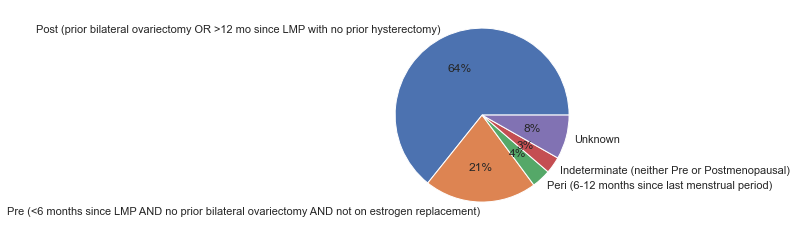

In [9]:
total = len(df_clean)

def my_fmt(x):
    print(x)
    return '{:.0f}%\n({:.0f})'.format(x, total*x/100)



hist=df_clean [('menopause_status', 'menopause_status', 'CDE_ID:2957270')].value_counts()
hist['Unknown']=hist['[Unknown]']+hist['[Not Evaluated]']+hist['[Not Available]']
del hist['[Unknown]'], hist['[Not Evaluated]'], hist['[Not Available]']

plt.pie(hist.values, labels=hist.index,autopct='%1.0f%%')

98.90610575675964
1.0938924737274647


([&lt;matplotlib.patches.Wedge at 0x17cdc3fa2e0&gt;,
  &lt;matplotlib.patches.Wedge at 0x17cdc3fa970&gt;],
 [Text(-1.0993505131443675, 0.03779483098541275, &#39;FEMALE&#39;),
  Text(1.2992324221421028, -0.04466669066278898, &#39;MALE&#39;)],
 [Text(-0.5996457344423822, 0.020615362355679682, &#39;99%\n(1085)&#39;),
  Text(0.7995276443951401, -0.027487194254023985, &#39;1%\n(12)&#39;)])

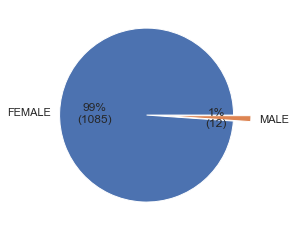

In [10]:


hist=df_clean[('gender', 'gender', 'CDE_ID:2200604')].value_counts()
total = len(df_clean[('gender', 'gender', 'CDE_ID:2200604')])
plt.pie(hist.values, labels=hist.index, explode = [.0,.2],autopct=my_fmt)

&lt;AxesSubplot:ylabel=&#39;Density&#39;&gt;

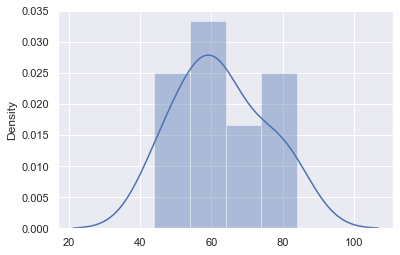

In [11]:
sns.distplot(df_clean[df_clean[('gender', 'gender', 'CDE_ID:2200604')]=='MALE'][('age_at_diagnosis', 'age_at_initial_pathologic_diagnosis','CDE_ID:2006657')].values)

&lt;AxesSubplot:ylabel=&#39;Density&#39;&gt;

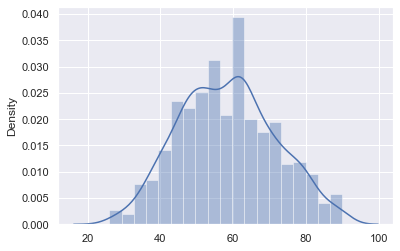

In [12]:

sns.distplot(df_clean[df_clean[('gender', 'gender', 'CDE_ID:2200604')]=='FEMALE'][('age_at_diagnosis', 'age_at_initial_pathologic_diagnosis','CDE_ID:2006657')].values)

In [13]:
df_clean.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 38 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   (bcr_patient_barcode, bcr_patient_barcode, CDE_ID:2003301)                                                       1097 non-null   object
 1   (prospective_collection, tissue_prospective_collection_indicator, CDE_ID:3088492)                                1097 non-null   object
 2   (retrospective_collection, tissue_retrospective_collection_indicator, CDE_ID:3088528)                            1097 non-null   object
 3   (gender, gender, CDE_ID:2200604)                                                                                 1097 non-null   object
 4   (menopause_status, menopause

In [14]:
df_clean[('prospective_collection', 'tissue_prospective_collection_indicator', 'CDE_ID:3088492')].value_counts()

NO                 731
YES                362
[Not Available]      4
Name: (prospective_collection, tissue_prospective_collection_indicator, CDE_ID:3088492), dtype: int64

# Feature Selection 2 (Dataset preprocessing)

In [16]:
#retro and pro-spective split
df_clean_prospectve=df_clean.loc[df_clean[('prospective_collection', 'tissue_prospective_collection_indicator', 'CDE_ID:3088492')]=='YES'].copy()
df_clean_retrospectve=df_clean.loc[df_clean[('retrospective_collection', 'tissue_retrospective_collection_indicator', 'CDE_ID:3088528')]=='YES'].copy()
del df_clean_prospectve[('prospective_collection', 'tissue_prospective_collection_indicator', 'CDE_ID:3088492')]
del df_clean_retrospectve[('retrospective_collection', 'tissue_retrospective_collection_indicator', 'CDE_ID:3088528')]
del df_clean_retrospectve[('prospective_collection', 'tissue_prospective_collection_indicator', 'CDE_ID:3088492')]
del df_clean_prospectve[('retrospective_collection', 'tissue_retrospective_collection_indicator', 'CDE_ID:3088528')]

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin #call the library to use the class LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
    

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        encoder=MyLabelBinarizer()
        output = []
       
        for col in self.columns:
           encoder.fit(X[col])
           output = encoder.transform(X[col])
           return output

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class FeatureSelector(BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 


# Pipeline CAT

In [19]:
#define cat pipeline
categorical_features= [('menopause_status', 'menopause_status', 'CDE_ID:2957270'),('ethnicity', 'ethnicity', 'CDE_ID:2192217')]
categorical_pipeline = Pipeline( steps = [ ( 'cat_selector', FeatureSelector(categorical_features) ),('ohe',OneHotEncoder(sparse=False))])

In [20]:
#input and label, cross-val split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = categorical_pipeline.fit_transform(df_clean)
y = df_clean[('age_at_diagnosis', 'age_at_initial_pathologic_diagnosis', 'CDE_ID:2006657')].values 

X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 41)

# Models with Cross-Validation

In [21]:
def display_scores(scores):

    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

# Linear/Logistic Reg

In [30]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression().fit( X_train, y_train )

scores = cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
lin_rmse = np.sqrt(-scores)

display_scores(lin_rmse)


Scores: [10.11240975  9.93743914 10.29139164  8.17000212  9.91051717  9.84352058
 10.34197535  9.44060379  9.03005348  9.8260477 ]
Mean: 9.690396073120978
Standard deviation: 0.6265161701048721


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
tree_rmse = np.sqrt(-scores)

display_scores(tree_rmse)

Scores: [10.42359594  9.90710736 10.30647903  8.47728368 10.00720942  9.88380849
 10.29731883  9.37589636  9.23703098 10.05970747]
Mean: 9.797543756237634
Standard deviation: 0.5716567695653978


# Ensemble Learning: Building a model on top of many other models

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

scores = cross_val_score(forest_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
forest_rmse = np.sqrt(-scores)

display_scores(forest_rmse)

Scores: [10.38197094  9.87461972 10.30315451  8.46864994  9.96218578  9.86947018
 10.26249906  9.36617799  9.23339975 10.02799441]
Mean: 9.775012226371514
Standard deviation: 0.5630209920069474


# Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=10)

In [36]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
        
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
     print(np.sqrt(-mean_score), params)

9.947310687146876 {&#39;max_features&#39;: 2, &#39;n_estimators&#39;: 3}
9.796209758959844 {&#39;max_features&#39;: 2, &#39;n_estimators&#39;: 10}
9.820526253249083 {&#39;max_features&#39;: 2, &#39;n_estimators&#39;: 30}
9.901956020327614 {&#39;max_features&#39;: 4, &#39;n_estimators&#39;: 3}
9.875133291490672 {&#39;max_features&#39;: 4, &#39;n_estimators&#39;: 10}
9.803784774884223 {&#39;max_features&#39;: 4, &#39;n_estimators&#39;: 30}
9.904198576548366 {&#39;max_features&#39;: 6, &#39;n_estimators&#39;: 3}
9.850869635918436 {&#39;max_features&#39;: 6, &#39;n_estimators&#39;: 10}
9.845519698486063 {&#39;max_features&#39;: 6, &#39;n_estimators&#39;: 30}
9.81524256345795 {&#39;max_features&#39;: 8, &#39;n_estimators&#39;: 3}
9.832646802670526 {&#39;max_features&#39;: 8, &#39;n_estimators&#39;: 10}
9.835171404575089 {&#39;max_features&#39;: 8, &#39;n_estimators&#39;: 30}
9.871260015329256 {&#39;bootstrap&#39;: False, &#39;max_features&#39;: 2, &#39;n_estimators&#39;: 3}
9.86224647707851

In [34]:
cvres

{&#39;mean_fit_time&#39;: array([0.00398936, 0.01104326, 0.03630438, 0.00578427, 0.01196837,
        0.04148936, 0.00339074, 0.01555886, 0.03455019, 0.00379004,
        0.01296611, 0.04819183, 0.00398884, 0.00997314, 0.00299201,
        0.00857778, 0.00279284, 0.00718303]),
 &#39;std_fit_time&#39;: array([6.31128117e-04, 6.46392217e-04, 1.35436543e-03, 1.93459850e-03,
        2.74944918e-03, 9.70204360e-03, 4.88460878e-04, 2.57084858e-03,
        2.34128382e-03, 7.46391173e-04, 2.52251425e-03, 9.42895271e-03,
        6.31053754e-04, 1.09310234e-03, 4.67203091e-07, 1.01672879e-03,
        7.46735318e-04, 3.97875148e-04]),
 &#39;mean_score_time&#39;: array([0.00039897, 0.0007978 , 0.00219374, 0.00119662, 0.00119653,
        0.00259256, 0.00059848, 0.00091157, 0.00239305, 0.00099721,
        0.0007978 , 0.00239353, 0.00079808, 0.00119705, 0.00059824,
        0.00119677, 0.00039878, 0.00099673]),
 &#39;std_score_time&#39;: array([4.88636039e-04, 3.98898249e-04, 3.98850480e-04, 3.98755141e-

In [ ]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

X, y = load_digits(return_X_y=True)
X = categorical_pipeline.fit_transform(df_clean)
y = df_clean[('age_at_diagnosis', 'age_at_initial_pathologic_diagnosis', 'CDE_ID:2006657')].values 
title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, axes=axes, ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Plot outputs
plt.scatter(X_test[('menopause_status', 'menopause_status', 'CDE_ID:2957270')], y_test,  color='black')
plt.scatter(X_test[('menopause_status', 'menopause_status', 'CDE_ID:2957270')], y_pred, color='blue', linewidth=3)
plt.xticks(rotation=90)

plt.show()

In [ ]:
y_pred

In [ ]:
y_test